In [1]:
! pip install speechbrain


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 9.5 MB/s eta 0:00:00


In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import os
import zipfile
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
marathi_files = [f"/content/drive/MyDrive/marathi_noise_audios/marathi_noisy_synthesized_{i+1}.wav" for i in range(5)]
english_files = [f"/content/drive/MyDrive/english_noise_audios/english_noisy_processed_{i+1}.wav" for i in range(5)]

output_dir = "/content/drive/MyDrive/MetricGan/"
os.makedirs(output_dir, exist_ok=True)


In [5]:
import torch
import torchaudio
from speechbrain.inference.enhancement import SpectralMaskEnhancement

enhance_model = SpectralMaskEnhancement.from_hparams(
    source="speechbrain/metricgan-plus-voicebank",
    savedir="pretrained_models/metricgan-plus-voicebank",
)


hyperparams.yaml:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

enhance_model.ckpt:   0%|          | 0.00/7.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

In [7]:
def denoise_marathi_files():
    print("Processing Marathi files...")

    for i, file in enumerate(marathi_files):
        if not os.path.exists(file):
            print(f"File not found: {file}")
            continue

        print(f"Processing Marathi file: {file}")

        noisy = enhance_model.load_audio(file).unsqueeze(0)
        enhanced = enhance_model.enhance_batch(noisy, lengths=torch.tensor([1.]))

        output_filename = os.path.join(output_dir, f"MetricGAN_denoised_marathi_{i+1}.wav")
        torchaudio.save(output_filename, enhanced.cpu(), 16000)

        print(f"Denoised & Saved: {output_filename}")

    print("Marathi Speech Enhancement Completed.")


denoise_marathi_files()


Processing Marathi files...
Processing Marathi file: /content/drive/MyDrive/marathi_noise_audios/marathi_noisy_synthesized_1.wav
Denoised & Saved: /content/drive/MyDrive/MetricGan/MetricGAN_denoised_marathi_1.wav
Processing Marathi file: /content/drive/MyDrive/marathi_noise_audios/marathi_noisy_synthesized_2.wav
Denoised & Saved: /content/drive/MyDrive/MetricGan/MetricGAN_denoised_marathi_2.wav
Processing Marathi file: /content/drive/MyDrive/marathi_noise_audios/marathi_noisy_synthesized_3.wav
Denoised & Saved: /content/drive/MyDrive/MetricGan/MetricGAN_denoised_marathi_3.wav
Processing Marathi file: /content/drive/MyDrive/marathi_noise_audios/marathi_noisy_synthesized_4.wav
Denoised & Saved: /content/drive/MyDrive/MetricGan/MetricGAN_denoised_marathi_4.wav
Processing Marathi file: /content/drive/MyDrive/marathi_noise_audios/marathi_noisy_synthesized_5.wav
Denoised & Saved: /content/drive/MyDrive/MetricGan/MetricGAN_denoised_marathi_5.wav
Hindi Speech Enhancement Completed.


In [8]:
# Function to denoise English files
def denoise_english_files():
    print("Processing English files...")

    for i, file in enumerate(english_files):
        if not os.path.exists(file):
            print(f"File not found: {file}")
            continue

        print(f"Processing English file: {file}")

        noisy = enhance_model.load_audio(file).unsqueeze(0)
        enhanced = enhance_model.enhance_batch(noisy, lengths=torch.tensor([1.]))
        output_filename = os.path.join(output_dir, f"MetricGAN_denoised_english_{i+1}.wav")
        torchaudio.save(output_filename, enhanced.cpu(), 16000)

        print(f"Denoised & Saved: {output_filename}")

    print("English Speech Enhancement Completed.")


denoise_english_files()


Processing English files...
Processing English file: /content/drive/MyDrive/english_noise_audios/english_noisy_processed_1.wav
Denoised & Saved: /content/drive/MyDrive/MetricGan/MetricGAN_denoised_english_1.wav
Processing English file: /content/drive/MyDrive/english_noise_audios/english_noisy_processed_2.wav
Denoised & Saved: /content/drive/MyDrive/MetricGan/MetricGAN_denoised_english_2.wav
Processing English file: /content/drive/MyDrive/english_noise_audios/english_noisy_processed_3.wav
Denoised & Saved: /content/drive/MyDrive/MetricGan/MetricGAN_denoised_english_3.wav
Processing English file: /content/drive/MyDrive/english_noise_audios/english_noisy_processed_4.wav
Denoised & Saved: /content/drive/MyDrive/MetricGan/MetricGAN_denoised_english_4.wav
Processing English file: /content/drive/MyDrive/english_noise_audios/english_noisy_processed_5.wav
Denoised & Saved: /content/drive/MyDrive/MetricGan/MetricGAN_denoised_english_5.wav
English Speech Enhancement Completed.


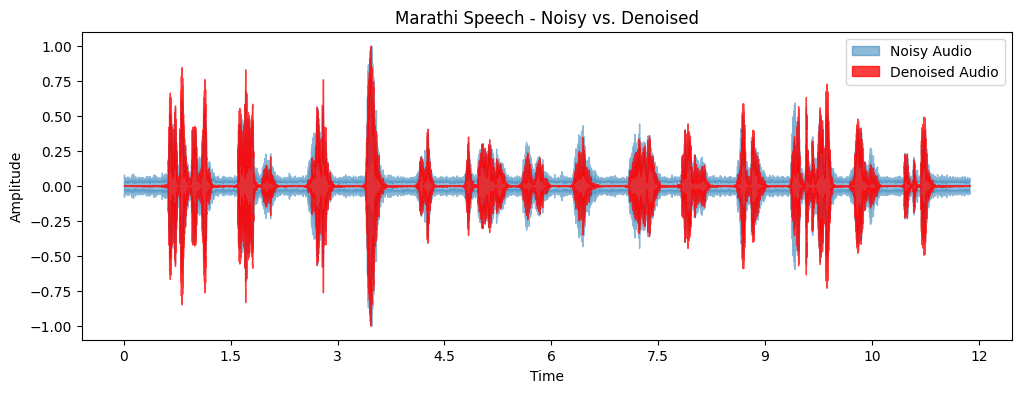

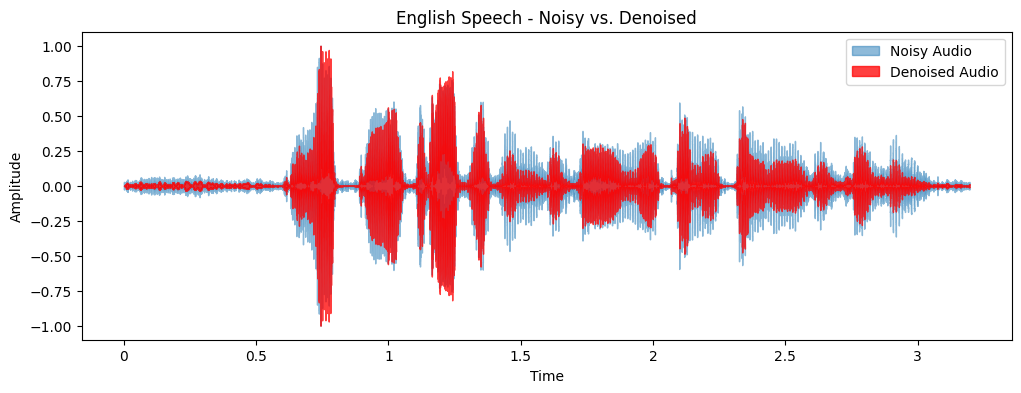

In [10]:
def plot_waveforms(noisy_file, denoised_file, title):
    noisy_audio, sr = librosa.load(noisy_file, sr=16000)
    denoised_audio, _ = librosa.load(denoised_file, sr=16000)

    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(noisy_audio, sr=sr, alpha=0.5, label="Noisy Audio")
    librosa.display.waveshow(denoised_audio, sr=sr, alpha=0.75, label="Denoised Audio", color='r')
    plt.title(f"{title} - Noisy vs. Denoised")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

plot_waveforms(marathi_files[0], f"{output_dir}MetricGAN_denoised_marathi_1.wav", "Marathi Speech")
plot_waveforms(english_files[0], f"{output_dir}MetricGAN_denoised_english_1.wav", "English Speech")


In [11]:
! pip install pesq pystoi numpy


  Preparing metadata (setup.py) ... done
  Created wheel for pesq: filename=pesq-0.0.4-cp310-cp310-linux_x86_64.whl size=262944 sha256=311269e71a6370f82f2201c614b4a838ea9219a8a70a62a499d6845bd4ea1027
  Stored in directory: /root/.cache/pip/wheels/c5/4e/2c/251524370c0fdd659e99639a0fbd0ca5a782c3aafcd456b28d
Successfully built pesq


In [13]:
import librosa
import numpy as np
from pesq import pesq
from pystoi import stoi

marathi_noisy_files = [f"/content/drive/MyDrive/marathi_noise_audios/marathi_noisy_synthesized_{i+1}.wav" for i in range(5)]
marathi_denoised_files = [f"/content/drive/MyDrive/MetricGan/MetricGAN_denoised_marathi_{i+1}.wav" for i in range(5)]

english_noisy_files =  [f"/content/drive/MyDrive/english_noise_audios/english_noisy_processed_{i+1}.wav" for i in range(5)]
english_denoised_files = [f"/content/drive/MyDrive/MetricGan/MetricGAN_denoised_english_{i+1}.wav" for i in range(5)]


results = []

def evaluate_quality(noisy_file, denoised_file, sr=16000):
    noisy_audio, _ = librosa.load(noisy_file, sr=sr)
    denoised_audio, _ = librosa.load(denoised_file, sr=sr)

    stoi_score = stoi(noisy_audio, denoised_audio, sr)

    pesq_score = pesq(sr, noisy_audio, denoised_audio, "nb")

    return pesq_score, stoi_score

print("\nEvaluating Marathi Speech Enhancement...")
for i in range(5):
    hindi_pesq, hindi_stoi = evaluate_quality(marathi_noisy_files[i], marathi_denoised_files[i])
    print(f"Marathi File {i+1} -> PESQ: {hindi_pesq:.3f}, STOI: {hindi_stoi:.3f}")
    results.append(["Marathi", i+1, hindi_pesq, hindi_stoi])

print("\nEvaluating English Speech Enhancement...")
for i in range(5):
    english_pesq, english_stoi = evaluate_quality(english_noisy_files[i], english_denoised_files[i])
    print(f"English File {i+1} -> PESQ: {english_pesq:.3f}, STOI: {english_stoi:.3f}")
    results.append(["English", i+1, english_pesq, english_stoi])

hindi_avg_pesq = np.mean([row[2] for row in results if row[0] == "Marathi"])
hindi_avg_stoi = np.mean([row[3] for row in results if row[0] == "Marathi"])

english_avg_pesq = np.mean([row[2] for row in results if row[0] == "English"])
english_avg_stoi = np.mean([row[3] for row in results if row[0] == "English"])

print("\nAverage Results:")
print(f"Marathi -> PESQ: {hindi_avg_pesq:.3f}, STOI: {hindi_avg_stoi:.3f}")
print(f"English -> PESQ: {english_avg_pesq:.3f}, STOI: {english_avg_stoi:.3f}")



Evaluating Marathi Speech Enhancement...
Marathi File 1 -> PESQ: 3.100, STOI: 0.796
Marathi File 2 -> PESQ: 3.000, STOI: 0.894
Marathi File 3 -> PESQ: 3.746, STOI: 0.933
Marathi File 4 -> PESQ: 3.605, STOI: 0.958
Marathi File 5 -> PESQ: 4.348, STOI: 0.961

Evaluating English Speech Enhancement...
English File 1 -> PESQ: 3.518, STOI: 0.909
English File 2 -> PESQ: 2.871, STOI: 0.870
English File 3 -> PESQ: 3.144, STOI: 0.880
English File 4 -> PESQ: 3.868, STOI: 0.985
English File 5 -> PESQ: 3.628, STOI: 0.914

Average Results:
Marathi -> PESQ: 3.560, STOI: 0.908
English -> PESQ: 3.406, STOI: 0.911
